Value at Risk (VaR) - the maximum loss within a confidence level over a predetermined period

#VaR Normal Distribution Method

normal distribution:

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(X-\mu)^2}{2\sigma^2}}$

* $f(x)$ - density function
* $x$ - input variable
* $\mu$ - mean
* $\sigma$ - standard deviation

General form to estimate VaR: VaR = $position*(\mu_{period}-z*\sigma_p)$

* VaR  - value at risk
* position - current market value of portfolio
* $\mu_{period}$ - expected period return
* $z$ - confidence level cut-off point
* σ - volatility of portfolio

For a normal distribution,  $z$=2.33 for a 99% confidence level, and $z$=1.64 for a 95% confidence level.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


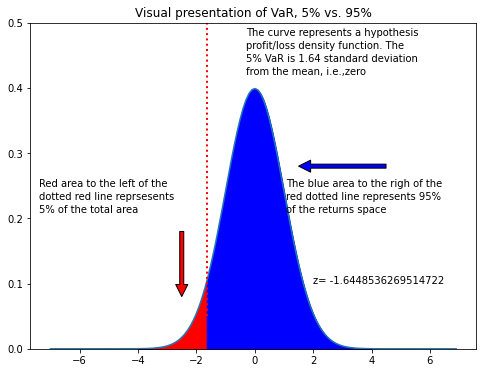

In [ ]:
# The following program shows the 5% VaR of a hypothetical profit-and-loss probability density function:

import scipy as sp
from scipy.stats import norm
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

confidence_level=0.95   # input 
z=norm.ppf(1-confidence_level) 
def f(t):
    return sp.stats.norm.pdf(t)
#
plt.figure(figsize(8,6))
plt.ylim(0,0.5)
x = sp.arange(-7,7,0.1) 
ret=f(x)
plt.plot(x,ret)
x2= sp.arange(-4,z,1/40.) 
x3=sp.arange(z,4,1/40.)
sum=0
delta=0.05
s=sp.arange(-3,z,delta) 
for i in s:
    sum+=f(i)*delta
note1='Red area to the left of the'
note2='dotted red line reprsesents'
note3='5% of the total area'
#
note4='The curve represents a hypothesis'
note5='profit/loss density function. The'
note6='5% VaR is 1.64 standard deviation'
note7='from the mean, i.e.,zero'
#
note8='The blue area to the righ of the'
note9='red dotted line represents 95%'
note10='of the returns space'
# this is for the vertical line
plt.axvline(x=z, ymin=0.1, ymax = 1, linewidth=2,ls='dotted', color='r')
plt.figtext(0.14,0.5,note1)
plt.figtext(0.14,0.47,note2)
plt.figtext(0.14,0.44,note3)
#
plt.figtext(0.5,0.85,note4)
plt.figtext(0.5,0.82,note5)
plt.figtext(0.5,0.79,note6)
plt.figtext(0.5,0.76,note7)
plt.annotate("",xy=(-2.5,0.08),xytext=(-2.5,0.18), arrowprops=dict(facecolor='red',shrink=0.001))
#
plt.figtext(0.57,0.5,note8)
plt.figtext(0.57,0.47,note9)
plt.figtext(0.57,0.44,note10)
plt.annotate("",xy=(1.5,0.28),xytext=(4.5,0.28), arrowprops=dict(facecolor='blue',shrink=0.001))
#
plt.annotate('z= '+str(z),xy=(2.,0.1)) 
plt.fill_between(x2,f(x2), color='red')
plt.fill_between(x3,f(x3), color='blue')
plt.title("Visual presentation of VaR, 5% vs. 95%")
plt.show()

In [ ]:
# The following shows a VaR for holding 50 shares of Ebay over a 10-day period with a condfidence level of 99%
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as tools
from scipy.stats import probplot
from scipy.stats import stats,norm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
today = datetime.today()
days = timedelta(days=1000)
start = today-days

In [ ]:
print('start:', start, '\t', 'end:', today)

start: 2019-04-07 17:09:04.042205 	 end: 2022-01-01 17:09:04.042205


In [ ]:
n_shares=50
confidence_level=0.99
n_days=10
z=norm.ppf(confidence_level) 

stk = 'EBAY'
stk = yf.download(stk, start, today)
df = stk['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
ret = df.pct_change(1)
ret.dropna(inplace=True)
ret

Date
2019-04-09   -0.001587
2019-04-10   -0.000795
2019-04-11   -0.037115
2019-04-12   -0.004130
2019-04-15    0.001659
                ...   
2021-12-27    0.011866
2021-12-28    0.006397
2021-12-29    0.005751
2021-12-30    0.004815
2021-12-31   -0.004193
Name: Adj Close, Length: 690, dtype: float64

In [ ]:
position=n_shares*df[0]

In [ ]:
VaR=position*z*np.std(ret)*np.sqrt(n_days)
print("Holding=",position)
print("VaR=", round(VaR,4), "for length", n_days, "Days")

Holding= 1822.5494384765625
VaR= 276.6265 for length 10 Days


In [ ]:
# test if returns are normally distributed
# first value is the test statistic and the second is the p-value

sp.stats.shapiro(ret)
# the p-value is small enough to reject the null-hypotesis that the returns follow a normal distribution

(0.9658111333847046, 1.3228459994074626e-11)

Skewness indicates whether the distribution is skewed to the left or right. A symmetric distribution has a skewness of zero.

$skew = \frac{Σ^n_i(R_i-\overline{R})^3}{(n-1)σ^3}$

In [ ]:
stats.skew(ret) # the data is skewed

-0.2739162837708631

Kurtosis reflects the impact of extreme values. A value close to zero indicates no kurtosis. 

kurtosis = $\frac{Σ^n_i(R_i-\overline{R})^4}{(n-1)σ^4}$

In [ ]:
stats.kurtosis(ret) # kurtosis exists in this data

2.6338221546767304

# Modified VaR method

Since the returns do not follow a normal distribution and shows both skewness and kurtosis the modified VaR method will be best.

$t$ = $z + \frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3 - 3z)K - \frac{1}{36}(2z^3 - 5z)S^2$

mVaR = $position*(\mu-t*\sigma)$

* $z$ - confidence level cut-off point for normal distribution
* $S$ - skewness
* $K$ - kurtosis
* $t$ - an intermediate variable or modified z score

In [ ]:
n_shares=50
confidence_level=0.99
n_days=10
z=norm.ppf(confidence_level)

stk = 'EBAY'
stk = yf.download(stk, start, today)
df = stk['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
ret = df.pct_change(1)
ret.dropna(inplace=True)
ret

Date
2019-04-09   -0.001587
2019-04-10   -0.000795
2019-04-11   -0.037115
2019-04-12   -0.004130
2019-04-15    0.001659
                ...   
2021-12-27    0.011866
2021-12-28    0.006397
2021-12-29    0.005751
2021-12-30    0.004815
2021-12-31   -0.004193
Name: Adj Close, Length: 690, dtype: float64

In [ ]:
position=n_shares*df[0]

In [ ]:
s = stats.skew(ret)

In [ ]:
k = stats.kurtosis(ret) # kurtosis exists in this data

In [ ]:
mean=np.mean(ret)
std=np.std(ret)
t=z+1/6.*(z**2-1)*s+1/24.*(z**3-3*z)*k-1/36.*(2*z**3-5*z)*s**2

In [ ]:
mVaR=position*(mean-t*std)

In [ ]:
print("Holding =",position) 
print("Modified VaR =", abs(round(mVaR,4)), "for", n_days, "Days")

Holding = 1822.5496292114258
Modified VaR = 100.0175 for 10 Days


This result suggests that ignoring the skewness and kurtosis would overstate VaR enormously.

# Monte Carlo simulation and VaR

This simulation creates 50 returns and calculates the modified VaR based on these stimulated returns.

In [ ]:
n_simulation=50
sp.random.seed(12345)
ret2=sp.random.normal(mean,std,n_simulation)

In [ ]:
s = stats.skew(ret2)

In [ ]:
k = stats.kurtosis(ret2) # kurtosis exists in this data

In [ ]:
mean=np.mean(ret2)
std=np.std(ret2)
t=z+1/6.*(z**2-1)*s+1/24.*(z**3-3*z)*k-1/36.*(2*z**3-5*z)*s**2

In [ ]:
m=int(n_simulation*(1-confidence_level))

In [ ]:
VaR=position*(ret2[m])
print("Holding =",position) 
print("VaR = ", abs(round(VaR,4)), "for tomorrow")

Holding = 1822.5496292114258
VaR =  5.7194 for tomorrow
